In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("fifa21_train.csv")

In [3]:
file_func = file.copy()

In [4]:
#display(file["LS"])

In [5]:
#pd.to_numeric(file["LS"], errors="coerce")

In [6]:
#file.info()

In [7]:
# display(file['Club'].unique())
#display(file['Club'].value_counts())

#display(file['Club'].value_counts(dropna=False))
#len(file[file['Club'].isna()==True])

In [8]:
#display(file.columns)

In [9]:
file_categorical = file.select_dtypes(object)

In [10]:
#display(file_categorical)

In [11]:
display(file_categorical.columns)

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object')

In [12]:
file_numerical = file.select_dtypes(np.number)

In [13]:
#display(file_numerical)

In [14]:
#display(file_categorical.isna().sum())

In [15]:
display(file_numerical.isna().sum())

ID                    0
Age                   0
Growth                0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              41
Skill                 0
Dribbling             0
Curve                41
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              41
Reactions             0
Balance              41
Power                 0
Shot Power            0
Jumping              41
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               41
Penalties             0
Composure           279
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle       41
Goalkeeping           0
GK Diving             0
GK Handling           0
GK Kicking      

In [16]:
display(file[(file["Volleys"].isna() == False) & (file["Curve"].isna() == False) & (file["Agility"].isna() == False)])

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,I. Ávila,29,Peru,Melgar FBC,ST,ST,Melgar FBC 2019 ~ 2021,"5'7""",154lbs,...,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2,65
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67


## Here we created a new DF where we kicked out some rows with many NaN

In [17]:
df_new = file[(file["Volleys"].isna() == False) & (file["Curve"].isna() == False) & (file["Agility"].isna() == False)]

In [18]:
#display(df_new)

In [19]:
display(df_new.isna().sum())

ID              0
Name            0
Age             0
Nationality     0
Club           14
               ..
CB              0
RCB             0
RB              0
GK              0
OVA             0
Length: 101, dtype: int64

In [20]:
# Numerical DataFrame
df_new_numerical = df_new.select_dtypes(np.number)

In [21]:
df_new_numerical.isna().sum()

ID                    0
Age                   0
Growth                0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys               0
Skill                 0
Dribbling             0
Curve                 0
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility               0
Reactions             0
Balance               0
Power                 0
Shot Power            0
Jumping               0
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         0
Positioning           0
Vision                0
Penalties             0
Composure           238
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle        0
Goalkeeping           0
GK Diving             0
GK Handling           0
GK Kicking      

In [22]:
mean_composure = df_new_numerical["Composure"].mean()

In [23]:
df_new_numerical["Composure"].describe()

count    11422.000000
mean        59.947732
std         11.769872
min         12.000000
25%         53.000000
50%         61.000000
75%         68.000000
max         96.000000
Name: Composure, dtype: float64

In [24]:
df_new_numerical["Composure"] = df_new_numerical["Composure"].fillna(mean_composure)

/var/folders/vn/08z_mvy95tzdstqgmlzmj2fc0000gn/T/ipykernel_25915/1352569923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_numerical["Composure"] = df_new_numerical["Composure"].fillna(mean_composure)


In [25]:
# Categorical Dataframe
df_new_categorical = df_new.select_dtypes(object)

In [26]:
df_new_categorical.isna().sum()

Name                   0
Nationality            0
Club                  14
BP                     0
Position             274
Team & Contract        0
Height                 0
Weight                 0
foot                   0
Joined                 0
Loan Date End      11031
Value                  0
Wage                   0
Release Clause         0
Contract               0
W/F                    0
SM                     0
A/W                   18
D/W                   18
IR                     0
Hits                   0
LS                     0
ST                     0
RS                     0
LW                     0
LF                     0
CF                     0
RF                     0
RW                     0
LAM                    0
CAM                    0
RAM                    0
LM                     0
LCM                    0
CM                     0
RCM                    0
RM                     0
LWB                    0
LDM                    0
CDM                    0


In [27]:
#df_new_categorical["Position"].unique()

In [28]:
df_new_categorical["Club"].value_counts(dropna=False)

OGC Nice               35
Everton                35
Crystal Palace         35
Sporting CP            33
Fenerbahçe SK          32
                       ..
FC Rostov               1
Patriotas Boyacá FC     1
Osmanlıspor             1
Guizhou Hengfeng FC     1
Wexford Youths          1
Name: Club, Length: 880, dtype: int64

In [29]:
len(df_new_categorical["Club"])

11660

In [30]:
#df_new_categorical["Club"].unique()

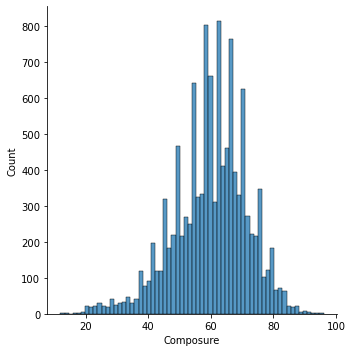

In [31]:
sns.displot(df_new_numerical["Composure"])
plt.show()

In [32]:
Position=pd.DataFrame(df_new_categorical['Position'].value_counts())
display(Position)

,Position
CB,1347
ST,1260
GK,1038
CDM CM,515
CM,446
...,...
RB CM CAM,1
CF RM RW,1
LB LWB RB,1
LB CM LW,1


In [33]:
pos = np.array(["CB", "ST", "GK"])

In [34]:
#df_new_categorical["Position"].unique()
#np.random.choice(df_new_categorical["Position"].unique(),size=2)
list_position_na = list(df_new_categorical[df_new_categorical["Position"].isna() == True].index)
#list_position_na
#df_new_categorical.loc[list_position_na,["Position"]]
df_new_categorical.loc[list_position_na,["Position"]] = np.random.choice(pos ,size=len(list_position_na)).reshape((-1,1))

#repl = np.random.choice(pos ,size=len(list_position_na))
#display(repl)
#display(lenay(list_position_na)
#df_new_categorical.loc[list_position_na,["Position"]] = repl
df_new_categorical.loc[list_position_na,['Position']].head()
#np.random.choice(df_new_categorical["Position"],size=len(list_position_na)).reshape((-1,1)).shape

/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Position
17,CB
59,CB
132,CB
157,CB
214,GK


In [35]:
Club=pd.DataFrame(df_new_categorical['Club'].value_counts())
display(Club)
Club.info()

,Club
Everton,35
OGC Nice,35
Crystal Palace,35
Sporting CP,33
Chelsea,32
...,...
FC Rostov,1
Patriotas Boyacá FC,1
Osmanlıspor,1
Guizhou Hengfeng FC,1


<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, Everton to Wexford Youths
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Club    879 non-null    int64
dtypes: int64(1)
memory usage: 13.7+ KB


In [36]:
Club=pd.DataFrame(df_new_categorical['A/W'].value_counts())
display(Club)
Club.info()

,A/W
Medium,7494
High,3548
Low,600


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Medium to Low
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A/W     3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [37]:
Club=pd.DataFrame(df_new_categorical['D/W'].value_counts())
display(Club)
Club.info()

,D/W
Medium,8350
High,2027
Low,1265


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Medium to Low
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D/W     3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [38]:
#df_new_categorical.isna().sum()

In [39]:
df_new_categorical["D/W"] = df_new_categorical["D/W"].fillna("Medium")

/var/folders/vn/08z_mvy95tzdstqgmlzmj2fc0000gn/T/ipykernel_25915/1987742565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_categorical["D/W"] = df_new_categorical["D/W"].fillna("Medium")


In [40]:
df_new_categorical["A/W"] = df_new_categorical["A/W"].fillna("Medium")

/var/folders/vn/08z_mvy95tzdstqgmlzmj2fc0000gn/T/ipykernel_25915/3233577188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_categorical["A/W"] = df_new_categorical["A/W"].fillna("Medium")


In [41]:
#df_new_categorical["Position"].unique()
#np.random.choice(df_new_categorical["Position"].unique(),size=2)
list_club_na = list(df_new_categorical[df_new_categorical["Club"].isna() == True].index)
#list_position_na
#df_new_categorical.loc[list_position_na,["Position"]]
df_new_categorical.loc[list_club_na,["Club"]] = np.random.choice(df_new_categorical["Club"] ,size=len(list_club_na)).reshape((-1,1))

#repl = np.random.choice(pos ,size=len(list_position_na))
#display(repl)
#display(lenay(list_position_na)
#df_new_categorical.loc[list_position_na,["Position"]] = repl
#df_new_categorical.loc[list_position_na,['Position']].head()
#np.random.choice(df_new_categorical["Position"],size=len(list_position_na)).reshape((-1,1)).shape

/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [42]:
Club=pd.DataFrame(df_new_categorical['Loan Date End'].value_counts())
display(Club)
Club.info()

,Loan Date End
"Jun 30, 2021",370
"Jun 30, 2020",72
"Dec 31, 2020",55
"Jun 30, 2019",19
"Jun 30, 2018",17
"May 31, 2021",15
"Dec 31, 2021",12
"Jan 31, 2021",11
"Jun 30, 2022",8
"Jan 1, 2021",7


<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Jun 30, 2021 to Aug 31, 2020
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Loan Date End  34 non-null     int64
dtypes: int64(1)
memory usage: 544.0+ bytes


In [43]:
df_new_categorical = df_new_categorical.drop(columns=["Loan Date End"])

In [44]:
df_new_categorical.columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK'],
      dtype='object')

In [45]:
#df_new_numerical.columns

In [46]:
df_new_numerical= df_new_numerical.rename(columns={"PAC":"Pace",
"SHO":"Shooting",
"PAS":"Passing",
"DRI":"Dribbling",
"DEF":"Defense",
"PHY":"Physical/Positioning",
"OVA":"Overall Rating"})

In [47]:
df_new_numerical.columns

Index(['ID', 'Age', 'Growth', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defense',
       'Physical/Positioning', 'Overall Rating'],
      dtype='object')

In [48]:
df_new_categorical = df_new_categorical.rename(columns={"CB": "Center-back",
"LCB": "Left center-back",
"RCB": "Right center-back",
"LB": "Left-back Full-back",
"RB": "Right-back Full-back",
"CM" : "Centre midfield",
"LDM": "Left center midfield",
"LAM": "Left attacking midfield",
"RDM": "Right center midfield",
"RAM": "Right attacking midfield",
"CDM": "Centre defensive midfield",
"CAM": "Centre attacking midfield",
"LM" : "Left midfield",
"RM" : "Right midfield",
"ST": "Striker",
"CF": "Center forward",
"LW": "Left winger",
"RW": "Right winger"})

In [49]:
df_new_categorical.columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'Striker',
       'RS', 'Left winger', 'LF', 'Center forward', 'RF', 'Right winger',
       'Left attacking midfield', 'Centre attacking midfield',
       'Right attacking midfield', 'Left midfield', 'LCM', 'Centre midfield',
       'RCM', 'Right midfield', 'LWB', 'Left center midfield',
       'Centre defensive midfield', 'Right center midfield', 'RWB',
       'Left-back Full-back', 'Left center-back', 'Center-back',
       'Right center-back', 'Right-back Full-back', 'GK'],
      dtype='object')

In [50]:
df_new_categorical = df_new_categorical.rename(columns={"SM": "Skill Moves",
"BP": "Best Position",
"IR": "International Reputation",
"LS": "Long Shots",
"RS": "Right Striker",
"LF": "Left Forward",
"RF": "Right Forward",
"LCM": "Left Centre Midfield",
"RCM": "Right Centre Midfield",
"LWB": "Left Wing Back",
"RWB": "Right Wing Back",
"GK": "Goal Keeper",
"A/W": "Attacking Workrate",
"D/W": "Defensing Workrate",
"W/F": "Weak Foot"
})

In [51]:
df_cleaned = pd.concat([df_new])

# Function

In [52]:
def fifa_data_cleaning(df):
    # remove the NaN rows
    df_new = df[(df["Volleys"].isna() == False) & (file["Curve"].isna() == False) & (file["Agility"].isna() == False)]
    # Numerical DataFrame
    df_new_numerical = df_new.select_dtypes(np.number)
    # Categorical Dataframe
    df_new_categorical = df_new.select_dtypes(object)
    #fillna at "Composure"
    mean_composure = df_new_numerical["Composure"].mean()
    df_new_numerical["Composure"] = df_new_numerical["Composure"].fillna(mean_composure)
    #fillna at "Position"
    pos = np.array(["CB", "ST", "GK"])
    list_position_na = list(df_new_categorical[df_new_categorical["Position"].isna() == True].index)
    df_new_categorical.loc[list_position_na,["Position"]] = np.random.choice(pos ,size=len(list_position_na)).reshape((-1,1))
    #fillna at "D/W" fillna at "A/W"
    df_new_categorical[["D/W", "A/W"]] = df_new_categorical[["D/W", "A/W"]].fillna("Medium")
    #fillna at "Club"
    list_club_na = list(df_new_categorical[df_new_categorical["Club"].isna() == True].index)
    df_new_categorical.loc[list_club_na,["Club"]] = np.random.choice(df_new_categorical["Club"] ,size=len(list_club_na)).reshape((-1,1))
    #dropping "Loan Date End"
    df_new_categorical = df_new_categorical.drop(columns=["Loan Date End"])
    #rename numerical DF
    df_new_numerical= df_new_numerical.rename(columns={
    "PAC":"Pace",
    "SHO":"Shooting",
    "PAS":"Passing",
    "DRI":"Dribbling",
    "DEF":"Defense",
    "PHY":"Physical/Positioning",
    "OVA":"Overall Rating"})
    
    df_new_categorical = df_new_categorical.rename(columns={
    "LCB": "Left Center Back",
    "RCB": "Right Center Back",
    "LB": "Left Back",
    "RB": "Right Back",
    "CM" : "Center Midfield",
    "LDM": "Left Center Midfield",
    "LAM": "Left Attacking Midfield",
    "RDM": "Right Center Midfield",
    "RAM": "Right Attacking Midfield",
    "CDM": "Center Defensive Midfield",
    "CAM": "Center Attacking Midfield",
    "LM" : "Left Midfield",
    "RM" : "Right Midfield",
    "LW": "Left Winger",
    "RW": "Right Winger",
    "ST": "Striker",
    "CF": "Center Forward",
    "SM": "Skill Moves",
    "BP": "Best Position",
    "IR": "International Reputation",
    "LS": "Long Shots",
    "RS": "Right Striker",
    "LF": "Left Forward",
    "RF": "Right Forward",
    "LCM": "Left Center Midfield",
    "RCM": "Right Center Midfield",
    "LWB": "Left Wing Back",
    "RWB": "Right Wing Back",
    "GK": "Goal Keeper",
    "A/W": "Attacking Workrate",
    "D/W": "Defensing Workrate",
    "W/F": "Weak Foot",
    "CB": "Center Back"})
    
    return df_new_numerical, df_new_categorical
    
    

In [53]:
#display(file_categorical.isna().sum())

In [54]:
file_categorical[["D/W", "A/W"]] = file_categorical[["D/W", "A/W"]].fillna("Medium")

/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [55]:
num, cat = fifa_data_cleaning(file_func)

/var/folders/vn/08z_mvy95tzdstqgmlzmj2fc0000gn/T/ipykernel_25915/784438552.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_numerical["Composure"] = df_new_numerical["Composure"].fillna(mean_composure)
/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Hector_Martin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [56]:
#display(num.isna().sum())

In [57]:
display(cat)

,Name,Nationality,Club,Best Position,Position,Team & Contract,Height,Weight,foot,Joined,...,Left Center Midfield,Center Defensive Midfield,Right Center Midfield,Right Wing Back,Left Back,Left Center Back,Center Back,Right Center Back,Right Back,Goal Keeper
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",...,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,"Jan 16, 2015",...,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,"Jan 31, 2019",...,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,"Jul 1, 2016",...,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,"Jul 1, 2018",...,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,I. Ávila,Peru,Melgar FBC,ST,ST,Melgar FBC 2019 ~ 2021,"5'7""",154lbs,Right,"Jul 1, 2019",...,45+2,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2
11696,B. Böðvarsson,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,Left,"Feb 8, 2018",...,60+2,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2
11697,G. Gallon,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,Right,"Jul 1, 2019",...,26+2,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2
11698,J. Flores,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,Right,"Jan 23, 2019",...,44+2,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2


In [58]:
cat.columns


Index(['Name', 'Nationality', 'Club', 'Best Position', 'Position',
       'Team & Contract', 'Height', 'Weight', 'foot', 'Joined', 'Value',
       'Wage', 'Release Clause', 'Contract', 'Weak Foot', 'Skill Moves',
       'Attacking Workrate', 'Defensing Workrate', 'International Reputation',
       'Hits', 'Long Shots', 'Striker', 'Right Striker', 'Left Winger',
       'Left Forward', 'Center Forward', 'Right Forward', 'Right Winger',
       'Left Attacking Midfield', 'Center Attacking Midfield',
       'Right Attacking Midfield', 'Left Midfield', 'Left Center Midfield',
       'Center Midfield', 'Right Center Midfield', 'Right Midfield',
       'Left Wing Back', 'Left Center Midfield', 'Center Defensive Midfield',
       'Right Center Midfield', 'Right Wing Back', 'Left Back',
       'Left Center Back', 'Center Back', 'Right Center Back', 'Right Back',
       'Goal Keeper'],
      dtype='object')

In [59]:
#def sum_score(x):
    

In [60]:
def cleanlbs (x):
    x=x.removesuffix('lbs')
    return x

df_new_categorical['Weight'] = df_new_categorical['Weight'].apply(cleanlbs)

df_new_categorical['Weight'] = pd.to_numeric(df_new_categorical['Weight'], errors ='coerce')


def lb2kg (x):
    x = x* 0.453592
    return x

df_new_categorical['Weight'] = df_new_categorical['Weight'].apply(lb2kg)
display(df_new_categorical['Weight'])

0        73.028312
1        72.121128
2        60.781328
3        68.945984
4        68.038800
           ...    
11695    69.853168
11696    76.203456
11697    78.925008
11698    64.863656
11700    64.863656
Name: Weight, Length: 11660, dtype: float64

In [61]:
df_new_categorical['Weight'] = pd.to_numeric(df_new_categorical['Weight'], errors ='coerce')

In [62]:
def lb2kg (x):
    x = x* 0.453592
    x = round(x,1)
    return x

df_new_categorical['Weight'] = df_new_categorical['Weight'].apply(lb2kg)


In [63]:
df_new_categorical= df_new_categorical.rename(columns={"Weight":"Weight (kg)",})

df_new_categorical[['Weight (kg)']]

,Weight (kg)
0,33.1
1,32.7
2,27.6
3,31.3
4,30.9
...,...
11695,31.7
11696,34.6
11697,35.8
11698,29.4


In [69]:
%%writefile wage_transform.py

def wage_transform(x):
    x = str(x)
    if "K" in x:
        x = x.replace("K", "").replace("€", "")
        y = int(x) * 1000
    else:
        x = x.replace("€", "")
        y = int(x)
    return y

Writing wage_transform.py


In [76]:
#import wage_transform ##only works with notebooks stored on the same folder

UsageError: Line magic function `%%run` not found.
